In [21]:
# Set up our environment
import os
import numpy as np
import mglearn as mgl
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
from sklearn.impute import SimpleImputer
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as mp
import matplotlib.pyplot as plt
import tarfile
from six.moves import urllib

#The following is just to enable TensorFlow with GPU acceleration.
#I was originally working on a much larger dataset that needed this.
#I switched datasets due to overflow problems, but I kept this code.
import ctypes
hllDll = ctypes.WinDLL("C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.7\\bin\\cudart64_110.dll")
import tensorflow as tf

In [22]:
# Load & format our dataset
GAMMA = pd.read_csv("https://raw.githubusercontent.com/Disco-Gnome/DATA712/main/magic04.data",
                    sep=",",
                    header=None)
GAMMA.columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','gamma']

In [23]:
#I would use LabelEncoder() here, but that encodes h=1 & g=0,
#with no simple method for remapping. I want g=1 and h=0 explicitly,
#so I create this column manually
GAMMA['gamma_enc'] = GAMMA['gamma']
GAMMA['gamma_enc'].replace({'g':"1", 'h':"0"},
                           inplace=True)
GAMMA['gamma_enc'] = GAMMA['gamma_enc'].astype(int)
GAMMA = GAMMA.drop('gamma', axis=1)

GAMMA.info()
GAMMA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fLength    19020 non-null  float64
 1   fWidth     19020 non-null  float64
 2   fSize      19020 non-null  float64
 3   fConc      19020 non-null  float64
 4   fConc1     19020 non-null  float64
 5   fAsym      19020 non-null  float64
 6   fM3Long    19020 non-null  float64
 7   fM3Trans   19020 non-null  float64
 8   fAlpha     19020 non-null  float64
 9   fDist      19020 non-null  float64
 10  gamma_enc  19020 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,gamma_enc
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [19]:
###Create Training & Testing sets
GAMMA_X = GAMMA.drop('gamma_enc', axis=1)
GAMMA_y = GAMMA['gamma_enc']
X_train, X_test, y_train, y_test = train_test_split(GAMMA_X,
                                                    GAMMA_y,
                                                    stratify=GAMMA_y)

In [20]:
###Exploring our training set
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14265 entries, 9450 to 16423
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   14265 non-null  float64
 1   fWidth    14265 non-null  float64
 2   fSize     14265 non-null  float64
 3   fConc     14265 non-null  float64
 4   fConc1    14265 non-null  float64
 5   fAsym     14265 non-null  float64
 6   fM3Long   14265 non-null  float64
 7   fM3Trans  14265 non-null  float64
 8   fAlpha    14265 non-null  float64
 9   fDist     14265 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000
mean,53.090045,22.117939,2.824575,0.380687,0.214956,-4.110183,10.415832,0.131270,27.463513,194.243087
std,42.086376,18.203797,0.471527,0.182781,0.110614,58.626107,50.924293,20.675592,26.017200,74.538617
min,4.283500,0.000000,1.941300,0.013300,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.283900,11.851400,2.477100,0.236400,0.128600,-20.318600,-12.855100,-10.867600,5.578300,143.245000
50%,37.146400,17.159400,2.737600,0.354100,0.196700,4.153200,15.241100,0.000100,17.454500,192.029000
75%,69.797900,24.675400,3.101700,0.504700,0.286000,24.241400,35.811200,10.943200,45.557500,240.808000
max,305.422000,228.038500,5.323300,0.893000,0.675200,575.240700,231.446000,170.692000,90.000000,450.953000


In [7]:
y_train.info()
y_train.describe()

<class 'pandas.core.series.Series'>
Int64Index: 14265 entries, 10758 to 18365
Series name: gamma_enc
Non-Null Count  Dtype
--------------  -----
14265 non-null  int32
dtypes: int32(1)
memory usage: 167.2 KB


count    14265.000000
mean         0.648370
std          0.477496
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gamma_enc, dtype: float64

In [8]:
###Confirm no missing values and clean if necessary
GAMMA.isnull().any()
#There are no missing values in our total dataset, and by extension
#there are none in our training & testing sets.
#Additionally, the cleaning and formatting done as part of prepping
#our dataset earlier appears to have been enough for the data to be
#ready for next steps.

fLength      False
fWidth       False
fSize        False
fConc        False
fConc1       False
fAsym        False
fM3Long      False
fM3Trans     False
fAlpha       False
fDist        False
gamma_enc    False
dtype: bool

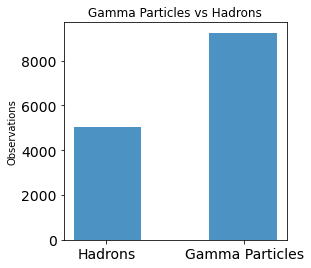

In [9]:
###Visualization
y_train.plot(kind='hist',
             alpha=0.8,
             title="Gamma Particles vs Hadrons",
             grid=False,
             figsize=(4,4),
             fontsize=14,
             bins=3)
plt.ylabel("Observations")
plt.xticks([0.16, 0.84], ["Hadrons", "Gamma Particles"])
plt.show()

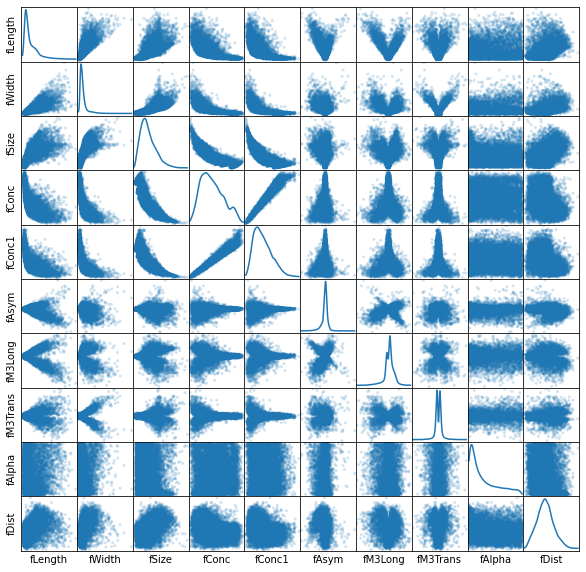

In [10]:
#Next, I would use some variation of: pd.plotting.scatter_matrix(X_train)
#But a default scatter matrix comes out looking crowded, with lots of
#overlapping text & irrelevant units. So, I do the following to adjust
#the appearance and remove sub-axis tics & labels.
sm = pd.plotting.scatter_matrix(X_train,
                                diagonal='kde',
                                figsize=(10,10),
                                alpha=0.2)
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
X_train_scatter = sm[0][0].get_figure()
#scatter_matrix.savefig("ScatterMatrix.png")
del (ax, subaxis, sm)

In [11]:
###Transform Data
#Note that this code is just to demonstrate competence with
#transformations. The variables given in our dataset are all
#already in a specific form for analysis. Several are
#themselves already transformations or derivations commonly
#used in this type of astronomy (called "Hillas parameters").
#I may have to leave this code unused in future projects.
#I save all measurements as part of a new dataframe to keep
#them separate. If I were planning to actually use these,
#I would append these as new columns on my full data.

#So, for example, if we wanted to log-normalize our ellipse
#Length or Width, which have very high variation. We would:
transform_df = pd.DataFrame()
transform_df['fLength'] = GAMMA['fLength']
transform_df['fLength_log'] = np.log(GAMMA["fLength"])
print("fLength Variance:", np.var(GAMMA['fLength']))
print("Log-fLength Variance:", np.var(transform_df['fLength_log']))

fLength Variance: 1794.6865714995756
Log-fLength Variance: 0.4605644093048651


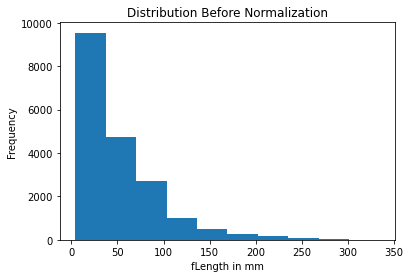

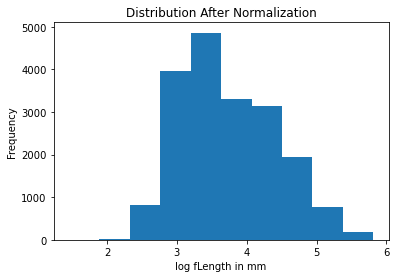

In [12]:
#Comparing distributions before and after log-normalization
GAMMA['fLength'].plot(kind='hist',
                      title="Distribution Before Normalization")
plt.ylabel('Frequency')
plt.xlabel('fLength in mm')
plt.show()
transform_df['fLength_log'].plot(kind='hist',
                                 title="Distribution After Normalization")
plt.ylabel('Frequency')
plt.xlabel('log fLength in mm')
plt.show()

In [13]:
#For Width, we would have to implement a solution for the existence
#of 0 values if we want to log-normalize. I believe zeros represent
#missing values here. So, one solution would be to impute using mean
#value. SimpleImputer only allows imputation of NA values, so here
#I impute zeros to mean manually
transform_df['fWidth'] = GAMMA['fWidth']
fWidth_mean = np.mean(transform_df['fWidth'])
transform_df['fWidth'] = transform_df['fWidth'].replace(0, fWidth_mean)
transform_df['fWidth_log'] = np.log(transform_df['fWidth'])
print("fWidth Variance:", np.var(transform_df['fWidth']))
print("Log-fWidth Variance:", np.var(transform_df['fWidth_log']))

fWidth Variance: 334.0120327791596
Log-fWidth Variance: 0.5123460561582196


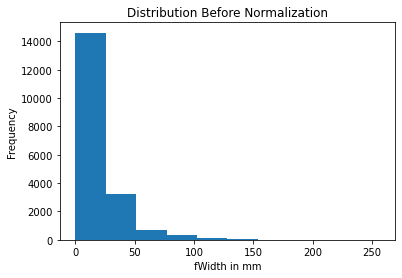

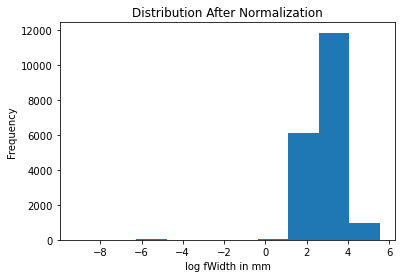

In [14]:
#Comparing distributions before and after log-normalization
GAMMA['fWidth'].plot(kind='hist',
                      title="Distribution Before Normalization")
plt.ylabel('Frequency')
plt.xlabel('fWidth in mm')
plt.show()
transform_df['fWidth_log'].plot(kind='hist',
                                 title="Distribution After Normalization")
plt.ylabel('Frequency')
plt.xlabel('log fWidth in mm')
plt.show()

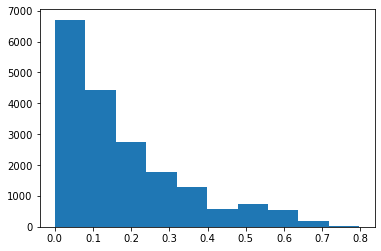

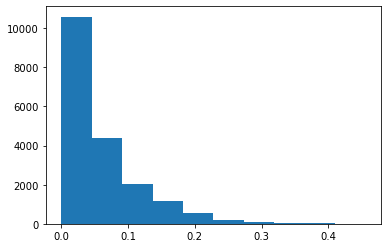

In [15]:
#If we wanted to normalize using squaring, cubing, or exponentials instead,
#we might want to look at variables that have a wider distribution, like
#fConc and fConc1. These are measures of the relative brightness of the
#brightest pixel(s) in a given observation.

#Squaring
plt.hist(GAMMA['fConc']**2, bins=10)
plt.show()
plt.hist(GAMMA['fConc1']**2, bins=10)
plt.show()

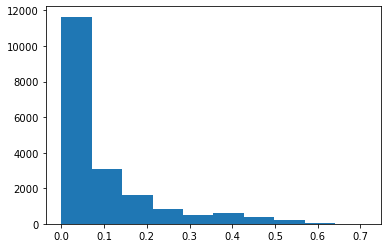

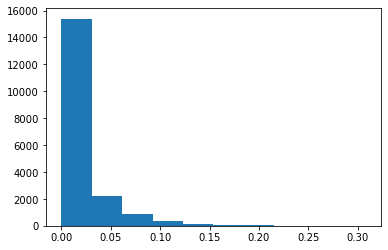

In [16]:
#Cubing
plt.hist(GAMMA['fConc']**3, bins=10)
plt.show()
plt.hist(GAMMA['fConc1']**3, bins=10)
plt.show()

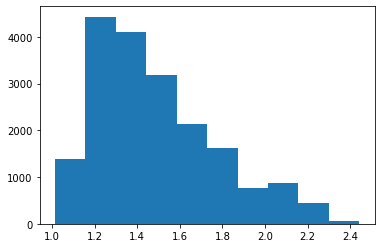

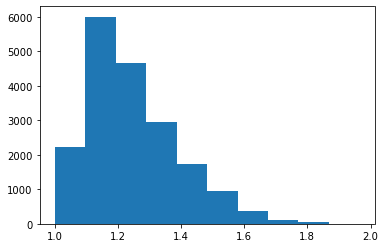

In [17]:
#Exponentials
plt.hist(np.exp(GAMMA['fConc']), bins=10)
plt.show()
plt.hist(np.exp(GAMMA['fConc1']), bins=10)
plt.show()

array([[<AxesSubplot:xlabel='fConc', ylabel='fConc'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc'>],
       [<AxesSubplot:xlabel='fConc', ylabel='fConc1'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc1'>]], dtype=object)

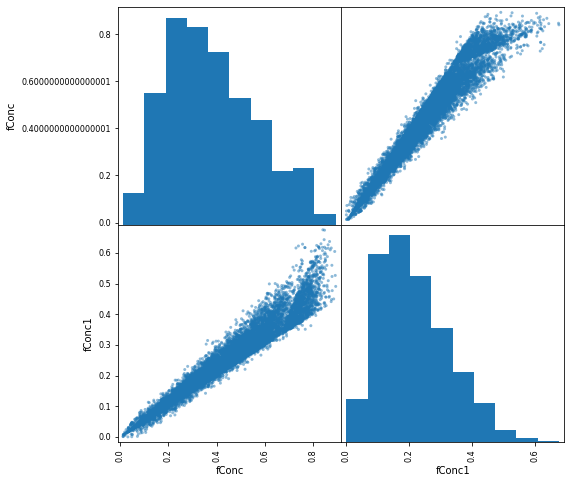

In [18]:
#Scatter matrix comparisons
attributes=['fConc', 'fConc1']
#Original values
scatter_matrix(GAMMA[attributes], figsize=(8,8))

array([[<AxesSubplot:xlabel='fConc', ylabel='fConc'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc'>],
       [<AxesSubplot:xlabel='fConc', ylabel='fConc1'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc1'>]], dtype=object)

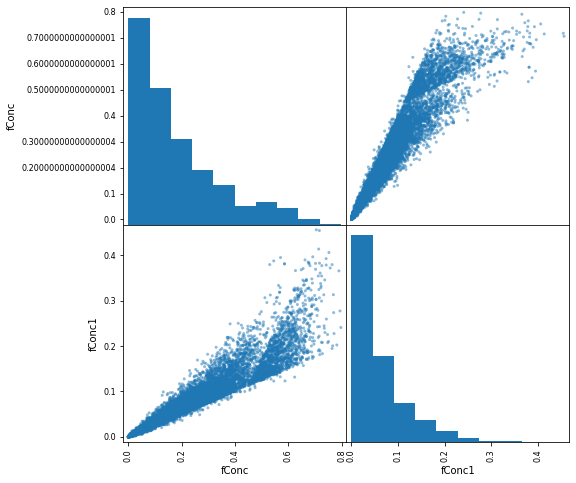

In [19]:
#Squared values
scatter_matrix(GAMMA[attributes]**2, figsize=(8,8))

array([[<AxesSubplot:xlabel='fConc', ylabel='fConc'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc'>],
       [<AxesSubplot:xlabel='fConc', ylabel='fConc1'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc1'>]], dtype=object)

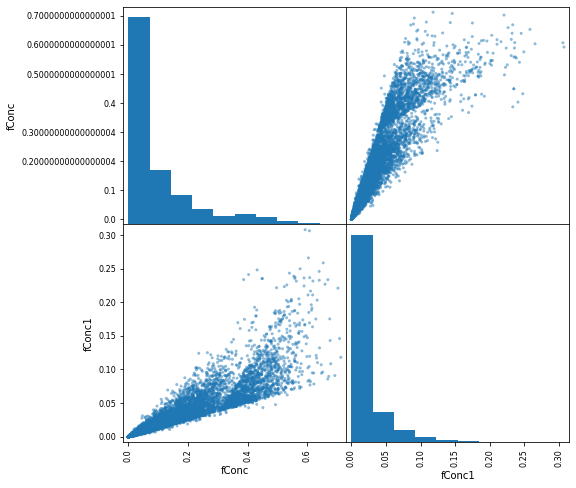

In [20]:
#Cubed Values
scatter_matrix(GAMMA[attributes]**3, figsize=(8,8))

array([[<AxesSubplot:xlabel='fConc', ylabel='fConc'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc'>],
       [<AxesSubplot:xlabel='fConc', ylabel='fConc1'>,
        <AxesSubplot:xlabel='fConc1', ylabel='fConc1'>]], dtype=object)

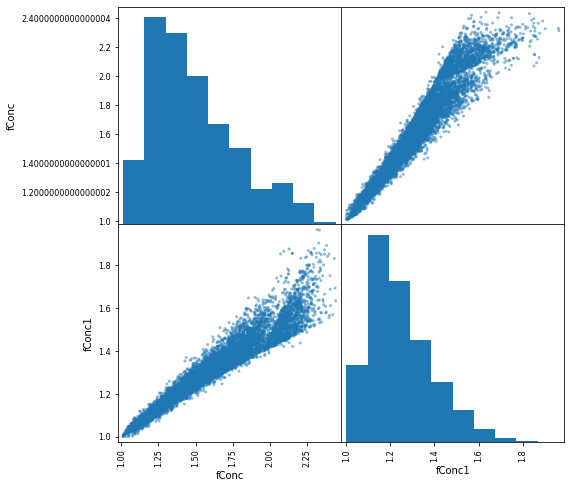

In [21]:
#Exponentials
scatter_matrix(np.exp(GAMMA[attributes]), figsize=(8,8))